In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import geopandas as gpd
import shapely.speedups
shapely.speedups.enable()
from shapely import wkt, wkb
from shapely.geometry import Polygon, Point, LinearRing, MultiPoint
from shapely.ops import nearest_points
from tqdm import tqdm, tqdm_notebook

#helper functions
import sys
sys.path.insert(0, '../helper_functions/')
import wfs_processing as wfs
import get_tables as get
import distance_matrix as dm
from logger_settings import logger
logger = logger()

import yaml
with open("../config.yaml", 'r') as config_yml:
    try:
        yml = yaml.load(config_yml)
        for section in yml:
            print('sections in YAML : {}'.format(section))
    except yaml.YAMLError as exc:
        print (exc)
        
PATH = '../data/pg_test/'

sections in YAML : path
sections in YAML : file
sections in YAML : file_stag_tables
sections in YAML : distance_matrix_files
sections in YAML : crs
sections in YAML : afvalcontainers
sections in YAML : dbscan_afvalcontainers
sections in YAML : dbscan_vot
sections in YAML : normen
sections in YAML : vot_koop_huur
sections in YAML : stadsdeel
sections in YAML : buurtcombi


In [2]:
afval_full = get.get_afvalcontainers_full_df(column_subset=True)

Thu, 20 Sep 2018 20:40:22 INFO     index has been reset
Thu, 20 Sep 2018 20:40:22 INFO     Afvalcontainers_full df has shape: (12299, 5) and crs: {'init': 'epsg:28992'}


In [3]:
afval_clusters = get.dbscan_reduce_afvalcontainers(afval_full)

shape input frame afval_full : (12299, 5)
shape cluster_labels array: (12299,)
num_clusters: 5598
Clustered 12,299 afvalcontainers down to 5,598 inzamellocaties, for 54.48% compression in 1.41 sec.


In [4]:
afval_clusters.head(1)

,container_id,point_geom,fractie,cluster_toewijzing,geometry
0,104319,POINT (119568.8149484682 486908.933835931),Rest,0,POINT (119568.8149484682 486908.933835931)


In [6]:
PATH = '../data/pg_test/'
afval_clusters.to_csv(PATH + 'afval_clusters.csv', index=False)

### distance_koop_papier

In [7]:
distance_koop_papier = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_koop_papier'])

Thu, 20 Sep 2018 21:00:40 INFO     GeoDataFrame has shape: (64095, 8) and crs: {'init': 'epsg:28992'}


In [8]:
distance_koop_papier.to_csv(PATH + 'distance_koop_papier.csv', index=False)

### distance_koop_rest

In [10]:
distance_koop_rest = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_koop_rest'])

Thu, 20 Sep 2018 21:03:03 INFO     GeoDataFrame has shape: (64095, 8) and crs: {'init': 'epsg:28992'}


In [13]:
distance_koop_rest.to_csv(PATH + 'distance_koop_rest.csv', index=False)

### distance_koop_plastic

In [15]:
distance_koop_plastic = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_koop_plastic'])

Thu, 20 Sep 2018 21:04:51 INFO     GeoDataFrame has shape: (64095, 8) and crs: {'init': 'epsg:28992'}


In [17]:
distance_koop_plastic.to_csv(PATH + 'distance_koop_plastic.csv', index=False)

### distance_koop_textiel

In [18]:
distance_koop_textiel = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_koop_textiel'])

Thu, 20 Sep 2018 21:05:42 INFO     GeoDataFrame has shape: (64095, 8) and crs: {'init': 'epsg:28992'}


In [20]:
distance_koop_textiel.to_csv(PATH + 'distance_koop_textiel.csv', index=False)

# HUUR

### distance_huur_rest

In [25]:
distance_huur_rest = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_huur_rest'])

Thu, 20 Sep 2018 21:09:51 INFO     GeoDataFrame has shape: (111362, 8) and crs: {'init': 'epsg:28992'}


In [27]:
distance_huur_rest.to_csv(PATH + 'distance_huur_rest.csv', index=False)

### distance_huur_glas

In [28]:
distance_huur_glas = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_huur_glas'])

Thu, 20 Sep 2018 21:11:44 INFO     GeoDataFrame has shape: (111362, 8) and crs: {'init': 'epsg:28992'}


In [29]:
distance_huur_glas.to_csv(PATH + 'distance_huur_glas.csv', index=False)

### distance_huur_papier

In [30]:
distance_huur_papier = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_huur_papier'])

Thu, 20 Sep 2018 21:12:30 INFO     GeoDataFrame has shape: (111362, 8) and crs: {'init': 'epsg:28992'}


In [31]:
distance_huur_papier.to_csv(PATH + 'distance_huur_papier.csv', index=False)

### distance_huur_plastic

In [32]:
distance_huur_plastic = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_huur_plastic'])

Thu, 20 Sep 2018 21:14:25 INFO     GeoDataFrame has shape: (111362, 8) and crs: {'init': 'epsg:28992'}


In [33]:
distance_huur_plastic.to_csv(PATH + 'distance_huur_plastic.csv', index=False)

### distance_huur_textiel

In [34]:
distance_huur_textiel = get.get_distance_matrices(path = yml['path']['distance_matrices'], 
                          file=yml['distance_matrix_files']['distance_huur_textiel'])

Thu, 20 Sep 2018 21:15:10 INFO     GeoDataFrame has shape: (111362, 8) and crs: {'init': 'epsg:28992'}


In [35]:
distance_huur_textiel.to_csv(PATH + 'distance_huur_textiel.csv', index=False)

### OBA

Thu, 20 Sep 2018 21:42:40 INFO     Loading oba_vestigingen.csv GeoDataFrame, with shape: (29, 16) and crs: {'init': 'epsg:28992'}
Thu, 20 Sep 2018 21:42:40 INFO     Requesting data from https://map.data.amsterdam.nl/maps/gebieden, layer: stadsdeel
Thu, 20 Sep 2018 21:42:41 INFO     8 features returned.
Thu, 20 Sep 2018 21:42:41 INFO     Spatial join of oba_vestigingen.csv GeoDataFrame and Amsterdam district layer.     Added columns : ['sd_code', 'geometry', 'sd_id', 'sd_name']
Thu, 20 Sep 2018 21:42:41 INFO     created 2000 meter buffer around MultiPoint geometry


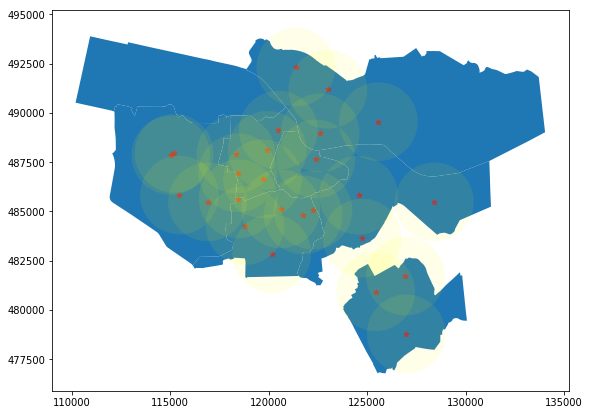

In [36]:
oba = get.get_df2(path = yml['path']['data_path_poi2'], file=yml['file']['oba'])

In [38]:
keep_cols = [ 'id','geometry', 'sd_name', 'buffer']
oba = oba[keep_cols]

In [39]:
oba.head(1)

,id,geometry,sd_name,buffer
0,1,(POINT (122605 488985)),Noord,"POLYGON ((124605 488985, 124595.3694533444 488..."


In [40]:
oba.to_csv(PATH + 'oba.csv', index=False)

### AH

Thu, 20 Sep 2018 21:48:20 INFO     Loading ah_vestigingen.csv GeoDataFrame, with shape: (75, 17) and crs: {'init': 'epsg:28992'}
Thu, 20 Sep 2018 21:48:20 INFO     Requesting data from https://map.data.amsterdam.nl/maps/gebieden, layer: stadsdeel
Thu, 20 Sep 2018 21:48:20 INFO     8 features returned.
Thu, 20 Sep 2018 21:48:20 INFO     Spatial join of ah_vestigingen.csv GeoDataFrame and Amsterdam district layer.     Added columns : ['sd_code', 'geometry', 'sd_id', 'sd_name']
Thu, 20 Sep 2018 21:48:20 INFO     created 1000 meter buffer around Point geometry


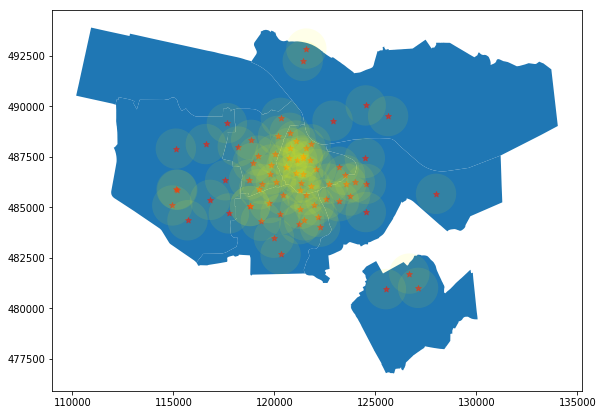

In [44]:
ah = get.get_df2(path = yml['path']['data_path_poi2'], file=yml['file']['ah'])

In [45]:
ah.head(1)

,id,geometry,functie2_o,zaaknaam,functie2_e,functie1_i,functie1_o,functie1_e,functie2_i,laag,adressen_l,adressen_v,adressen_a,oppervlakt,oppervla_1,checkdatum,zaak_id,index_right,sd_code,sd_id,sd_name,buffer
0,1,POINT (119371.6738817311 486146.2438925233),Supermarkt groot,ALBERT HEIJN,Supermarket large,D,Detailhandel,Retail,D03,1,Jan Pieter Heijestraat 142/H - 829 m2<br>Wilhe...,03630011872290-03630000870092,2,865,0,2017-03-10,5311,4,E,03630011872036,West,"POLYGON ((120371.6738817311 486146.2438925233,..."


In [47]:
keep_cols = [ 'id','geometry', 'sd_name', 'buffer']
ah = ah[keep_cols]

ah.to_csv(PATH + 'ah.csv', index=False)

### distance_oba_18 frame

In [3]:
distance_18_oba = pd.read_csv(yml['path']['distance_matrices'] + 'distance_oba_18.csv')

In [7]:
distance_18_oba = distance_18_oba.dropna(subset = ['pnd_dist_mean'])

In [24]:
distance_18_oba.to_csv(PATH + 'distance_oba_18.csv', index=False)

In [23]:
distance_18_oba.head(1)

,landelijk_pnd_id,geometry,geom_point,cluster_toewijzing,distance_min,distance_max,distance_mean,_merge,pnd_dist_mean
196,363100012169670,"POLYGON ((120794.890984315 488269.456863448, 1...",POINT (120793 488267),1,885,1953,1482,both,885.0


In [22]:
distance_18_oba.landelijk_pnd_id = distance_18_oba.landelijk_pnd_id.astype(str)

/home/diederik/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### vot65_rest

In [2]:
distance_vot65_rest = pd.read_csv(yml['path']['distance_matrices'] + 'distance_vot65_rest.csv')

In [3]:
distance_vot65_rest.head(1)

,landelijk_pnd_id,geometry,geom_point,cluster_toewijzing,distance_min,distance_max,distance_mean,_merge,pnd_dist_mean
0,NaN,"POLYGON ((123293.328736704 486836.246010649, 1...",POINT (123300.5543658813 486834.5533001287),153147,149,0.149234,0.149234,both,NaN


In [4]:
distance_vot65_rest.to_csv(PATH + 'distance_vot65_rest.csv', index=False)

### vot_all_ah

In [3]:
distance_vot_all_ah = pd.read_csv(yml['path']['distance_matrices'] + 'distance_vot_all_ah.csv')

In [7]:
distance_vot_all_ah.head(1)

,landelijk_pnd_id,geometry,geom_point,cluster_toewijzing,distance_min,distance_max,distance_mean,_merge,pnd_dist_mean
0,3.631000e+14,"POLYGON ((120221.70204345 487100.363979464, 12...",POINT (120216.8333333333 487100.6666666667),0,376,950,665,both,376.0


In [8]:
distance_vot_all_ah.to_csv(PATH + 'distance_vot_all_ah.csv', index=False)